In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv("COMP1801_CourseworkDataset1_tabular (3).csv")
df

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die
...,...,...,...,...,...,...,...,...,...,...,...
995,462.984817,Blade,equiGrain,24,2.023624,2.741713,20,0,0,Bottom,Continuous
996,1426.298870,Nozzle,equiGrain,21,1.741670,7.206022,12,0,0,Bottom,Investment
997,1538.072772,Blade,colGrain,14,1.658847,8.276388,12,0,0,Top,Investment
998,1893.052813,Nozzle,equiGrain,9,2.124314,5.033330,0,0,0,Bottom,Continuous


In [5]:
#Converting categorical values into numerical values

df['partType']=df['partType'].astype('category')
df['partType']=df['partType'].cat.codes

df['microstructure']=df['microstructure'].astype('category')
df['microstructure']=df['microstructure'].cat.codes

df['seedLocation']=df['seedLocation'].astype('category')
df['seedLocation']=df['seedLocation'].cat.codes

df['castType']=df['castType'].astype('category')
df['castType']=df['castType'].cat.codes

df

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,0,0,25,4.460592,7.937116,22,0,7,1,2
1,1599.551748,0,2,9,1.425973,2.432948,2,0,0,0,1
2,768.311031,2,0,26,2.508879,3.841211,25,0,0,0,2
3,1697.663828,0,0,12,3.248913,2.610700,10,0,0,0,0
4,1491.478862,2,0,20,1.901670,4.634926,24,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
995,462.984817,0,1,24,2.023624,2.741713,20,0,0,0,0
996,1426.298870,2,1,21,1.741670,7.206022,12,0,0,0,2
997,1538.072772,0,0,14,1.658847,8.276388,12,0,0,1,2
998,1893.052813,2,1,9,2.124314,5.033330,0,0,0,0,0


In [6]:
#Data cleaning (Seeing is there any duplicate or null value)

df.isnull().sum()

Lifespan          0
partType          0
microstructure    0
coolingRate       0
quenchTime        0
forgeTime         0
smallDefects      0
largeDefects      0
sliverDefects     0
seedLocation      0
castType          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   int8   
 2   microstructure  1000 non-null   int8   
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   smallDefects    1000 non-null   int64  
 7   largeDefects    1000 non-null   int64  
 8   sliverDefects   1000 non-null   int64  
 9   seedLocation    1000 non-null   int8   
 10  castType        1000 non-null   int8   
dtypes: float64(3), int64(4), int8(4)
memory usage: 58.7 KB


In [8]:
df.duplicated().sum()

0

In [9]:
#Getting the train portion
X=df.drop(columns="Lifespan")
X

,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,0,0,25,4.460592,7.937116,22,0,7,1,2
1,0,2,9,1.425973,2.432948,2,0,0,0,1
2,2,0,26,2.508879,3.841211,25,0,0,0,2
3,0,0,12,3.248913,2.610700,10,0,0,0,0
4,2,0,20,1.901670,4.634926,24,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2.023624,2.741713,20,0,0,0,0
996,2,1,21,1.741670,7.206022,12,0,0,0,2
997,0,0,14,1.658847,8.276388,12,0,0,1,2
998,2,1,9,2.124314,5.033330,0,0,0,0,0


In [10]:
#Prediction variable
y=df['Lifespan']
y

0       284.161690
1      1599.551748
2       768.311031
3      1697.663828
4      1491.478862
          ...     
995     462.984817
996    1426.298870
997    1538.072772
998    1893.052813
999     932.460716
Name: Lifespan, Length: 1000, dtype: float64

In [11]:
#Splitting the datasets using train_test method
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
#Importing linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [13]:
#Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
#Getting the Intercept
c=lr.intercept_
c

2209.7367725062513

In [15]:
#Getting the coefficient
m=lr.coef_
m

array([ 43.86933201,  34.44645003, -66.77463229,  37.68911962,
         0.35774398,  13.07116153,  -2.30407568, -21.92920721,
       -32.0742778 , -32.93487177])

In [16]:
#Predicting the Y value
y_predict_train=lr.predict(X_train)

In [17]:
y_predict_train

array([1991.43705493, 1573.43525782,  888.47892007,  703.83325819,
       1049.70776733,  977.60386285, 1814.67610244, 1679.74782432,
       1735.76653929, 1850.18319605,  953.58609367, 1537.58745699,
        967.52032484,  950.821791  , 1765.2175844 , 1283.32372563,
       1610.72072298,  759.59763336, 1587.23029205,  896.04620385,
       1564.71129337, 1678.09930338, 1494.64905693,  711.70869473,
       1836.42359759,  919.75560547, 1291.72529917, 1665.6967782 ,
       1793.64811452, 1278.1848964 , 1580.44933625, 1907.25191677,
       1248.76692275, 1515.51491846, 1318.32635025,  694.79765459,
        683.88809402, 2169.64696775, 1695.16042983, 1637.56070176,
       1403.66620023, 1752.0665256 , 1370.54513613,  670.72269009,
       1527.64669325,  652.66381804, 2037.99559126,  978.4247464 ,
       1812.61734867,  957.90668873, 1695.34816081, 1406.93437089,
        726.98362086,  911.43887993, 1088.85871841,  839.57283277,
       1685.76485606, 2060.06795593, 1493.50635065, 1384.60380

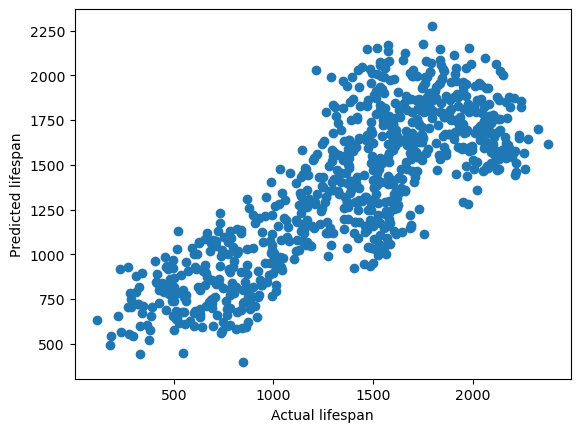

In [18]:
#To see how good our prediction
import matplotlib.pyplot as plt
plt.scatter(y_train,y_predict_train)
plt.xlabel("Actual lifespan",color='black')
plt.ylabel("Predicted lifespan")

plt.show()

In [19]:
#evaluating error
from sklearn.metrics import r2_score
r2_score(y_train,y_predict_train)

0.6590618236989041

In [20]:
from sklearn import metrics

In [21]:
y_predict_train=lr.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,y_predict_train))

304.5266987180204

In [22]:
lr.score(X_train, y_train)

0.6590618236989041

In [23]:
lr.score(X_test,y_test)

0.6794554143061703

In [28]:
# Ridge Regression 
from sklearn.linear_model import Ridge

In [32]:
R=Ridge(alpha=0.5)
R.fit(X_train,y_train)

Ridge(alpha=0.5)

In [33]:
R.score(X_train,y_train)

0.6590618079160558

In [34]:
R.score(X_test,y_test)

0.679451928472188

In [45]:
#Lasso regression
from sklearn import linear_model
LS = linear_model.Lasso(alpha=0.10)
LS.fit(X_train, y_train)

Lasso(alpha=0.1)

In [46]:
LS.score(X_train, y_train)

0.6590613420225788

In [47]:
LS.score(X_test, y_test)

0.6794167655624463